In [1]:
import pandas as pd
import string
import matplotlib.pyplot as plt
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, classification_report

In [2]:
def preprocess_text(text):
    text = text.lower()  # Convert to lowercase
    text = text.replace('\n', ' ')  # Replace newlines
    text = text.replace('\r', ' ')  # Replace carriage returns
    text = text.translate(str.maketrans('', '', string.punctuation))  # Remove punctuation
    text = ''.join([ch for ch in text if not ch.isdigit()])  # Remove digits
    return text

In [3]:
data = pd.read_csv("UpdatedResumeDataSet.csv")
data

,Category,Resume
0,Data Science,Skills * Programming Languages: Python (pandas...
1,Data Science,Education Details \r\nMay 2013 to May 2017 B.E...
2,Data Science,"Areas of Interest Deep Learning, Control Syste..."
3,Data Science,Skills â¢ R â¢ Python â¢ SAP HANA â¢ Table...
4,Data Science,"Education Details \r\n MCA YMCAUST, Faridab..."
...,...,...
957,Testing,Computer Skills: â¢ Proficient in MS office (...
958,Testing,â Willingness to accept the challenges. â ...
959,Testing,"PERSONAL SKILLS â¢ Quick learner, â¢ Eagerne..."
960,Testing,COMPUTER SKILLS & SOFTWARE KNOWLEDGE MS-Power ...


In [4]:
data.isnull().sum()

Category    0
Resume      0
dtype: int64

In [5]:
data['Resume'] = data['Resume'].apply(preprocess_text)
data

,Category,Resume
0,Data Science,skills programming languages python pandas nu...
1,Data Science,education details may to may be uitrgpv ...
2,Data Science,areas of interest deep learning control system...
3,Data Science,skills â¢ r â¢ python â¢ sap hana â¢ table...
4,Data Science,education details mca ymcaust faridabad ...
...,...,...
957,Testing,computer skills â¢ proficient in ms office wo...
958,Testing,â willingness to accept the challenges â p...
959,Testing,personal skills â¢ quick learner â¢ eagernes...
960,Testing,computer skills software knowledge mspower po...


In [6]:
vectorizer = CountVectorizer(stop_words='english')
x = vectorizer.fit_transform(data['Resume'])
y = data['Category']

In [7]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25, random_state=0)

In [8]:
model_nb = MultinomialNB().fit(x_train, y_train)
model_nb

,alpha,1.0
,force_alpha,True
,fit_prior,True
,class_prior,None


In [9]:
y_pred_nb = model_nb.predict(x_test)
y_pred_nb

array(['Python Developer', 'Health and fitness', 'Data Science',
       'Network Security Engineer', 'Java Developer',
       'Health and fitness', 'ETL Developer', 'Health and fitness',
       'Java Developer', 'Automation Testing', 'Data Science', 'Testing',
       'Business Analyst', 'Electrical Engineering', 'Hadoop',
       'Business Analyst', 'PMO', 'DevOps Engineer', 'DevOps Engineer',
       'DotNet Developer', 'HR', 'Electrical Engineering',
       'Network Security Engineer', 'Sales', 'PMO', 'Mechanical Engineer',
       'Civil Engineer', 'DevOps Engineer', 'Blockchain', 'PMO',
       'Python Developer', 'Operations Manager', 'Sales', 'Database',
       'Testing', 'Testing', 'Sales', 'Operations Manager', 'Database',
       'Python Developer', 'ETL Developer', 'Python Developer',
       'Health and fitness', 'DevOps Engineer', 'Java Developer',
       'Java Developer', 'DevOps Engineer', 'Electrical Engineering',
       'Business Analyst', 'Sales', 'Arts', 'Web Designing',
  

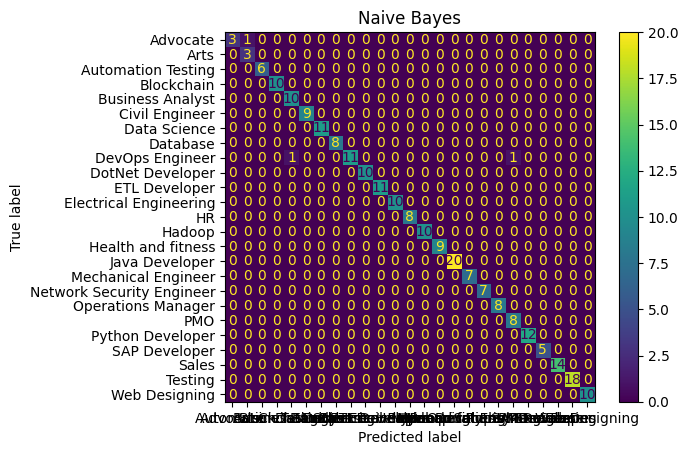

In [10]:
ConfusionMatrixDisplay.from_predictions(y_test,y_pred_nb)
plt.title('Naive Bayes')
plt.show()

In [11]:
# Accuracy
print('Accuracy:', accuracy_score(y_test, y_pred_nb))

Accuracy: 0.9875518672199171


In [12]:
# Classification report
print('Classification Report:\n', classification_report(y_test, y_pred_nb))

Classification Report:
                            precision    recall  f1-score   support

                 Advocate       1.00      0.75      0.86         4
                     Arts       0.75      1.00      0.86         3
       Automation Testing       1.00      1.00      1.00         6
               Blockchain       1.00      1.00      1.00        10
         Business Analyst       0.91      1.00      0.95        10
           Civil Engineer       1.00      1.00      1.00         9
             Data Science       1.00      1.00      1.00        11
                 Database       1.00      1.00      1.00         8
          DevOps Engineer       1.00      0.85      0.92        13
         DotNet Developer       1.00      1.00      1.00        10
            ETL Developer       1.00      1.00      1.00        11
   Electrical Engineering       1.00      1.00      1.00        10
                       HR       1.00      1.00      1.00         8
                   Hadoop       1.00 

In [13]:
sample_input_nb = input("Please enter a sample message: ")
sample_message_nb = preprocess_text(sample_input_nb)  # ✅ pass string
sample_message_nb = vectorizer.transform([sample_message_nb])
sample_pred_nb = model_nb.predict(sample_message_nb)

print("Predicted Job Title:", sample_pred_nb[0])


Please enter a sample message:  import pdfplumber import spacy from keybert import KeyBERT from sklearn.feature_extraction.text import ENGLISH_STOP_WORDS  # Load models nlp = spacy.load("en_core_web_sm") kw_model = KeyBERT()  def extract_text_from_pdf(pdf_path):     all_text = ""     with pdfplumber.open(pdf_path) as pdf:         for page in pdf.pages:             page_text = page.extract_text()             if page_text:                 all_text += page_text + "\n"     return all_text  def clean_and_lemmatize(text):     doc = nlp(text)     tokens = [         token.lemma_.lower()         for token in doc         if token.is_alpha and not token.is_stop and token.lemma_.lower() not in ENGLISH_STOP_WORDS     ]     return " ".join(tokens)  def extract_keywords(text, top_n=25):     # Use KeyBERT for keyword extraction with priority scores     keywords_with_scores = kw_model.extract_keywords(text, keyphrase_ngram_range=(1, 2), stop_words='english', top_n=top_n)     keywords = [kw for kw, scor

Predicted Job Title: HR


In [16]:
import joblib

# Save model
joblib.dump(model_nb, "job_predictor_model.pkl")

# Save vectorizer
joblib.dump(vectorizer, "tfidf_vectorizer.pkl")

['tfidf_vectorizer.pkl']